# Project: Driving Behaviour
- BL.EN.U4CSE20002 Aaqil Raj Krishna 
- BL.EN.U4CSE20008 Aluru S Vardhini 
- BL.EN.U4CSE20011 Anshuman Sahoo 
- BL.EN.U4CSE20040 G V S Snehanjali 

## Attaching Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

## Importing Train and Test Data

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/data/train_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data/test_data.csv')

In [ ]:
df_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


## Merging Normal and Slow Class to Normal Class for Binary Classification

In [ ]:
df_train['Class']=df_train['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])
df_test['Class']=df_test['Class'].replace(['NORMAL', 'SLOW', 'AGGRESSIVE'],[0, 0, 1])

## Pairplot of features

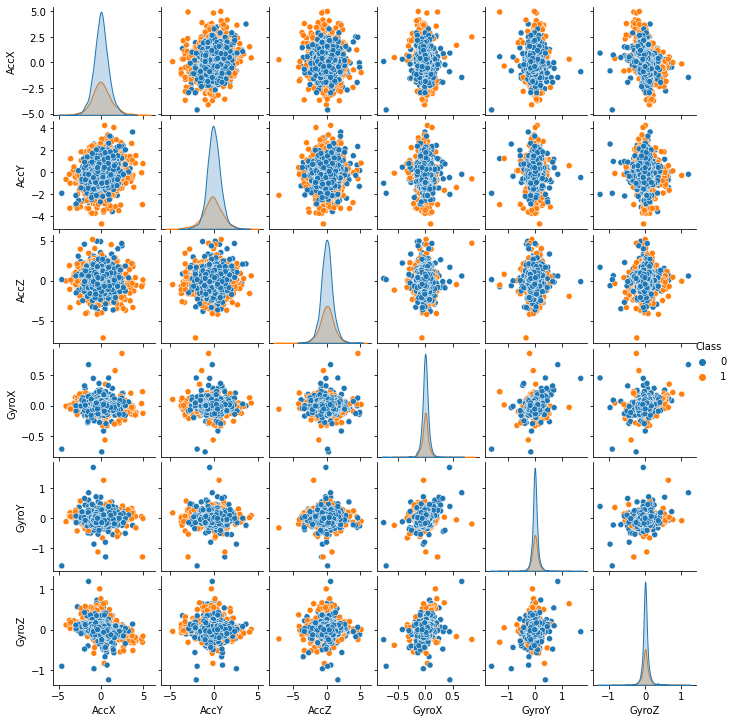

In [ ]:
sns.pairplot(df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'Class']], hue='Class')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

### Correlation heatmap

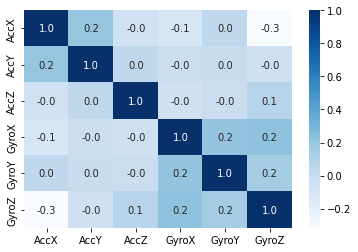

In [ ]:
sns.heatmap(df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']].corr(),annot=True, cbar=True, cmap='Blues', fmt='.1f')
plt.show()

### Boxplot by class and data from sensors

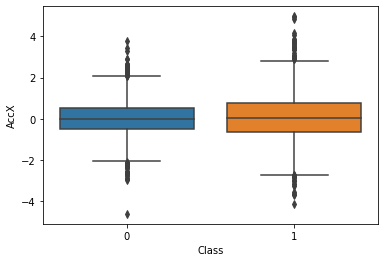

In [ ]:
sns.boxplot(x='Class', y='AccX',data=df_train)
plt.show()

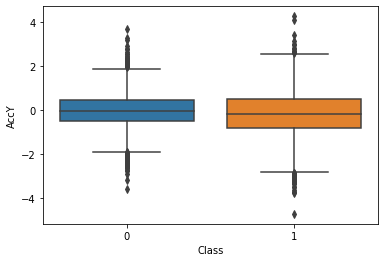

In [ ]:
sns.boxplot(x='Class', y='AccY',data=df_train)
plt.show()

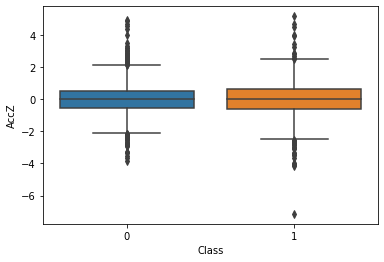

In [ ]:
sns.boxplot(x='Class', y='AccZ',data=df_train)
plt.show()

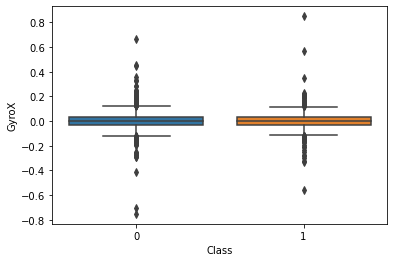

In [ ]:
sns.boxplot(x='Class', y='GyroX',data=df_train)
plt.show()

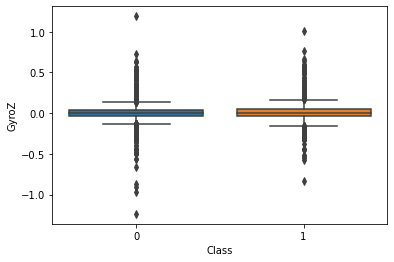

In [ ]:
sns.boxplot(x='Class', y='GyroZ',data=df_train)
plt.show()

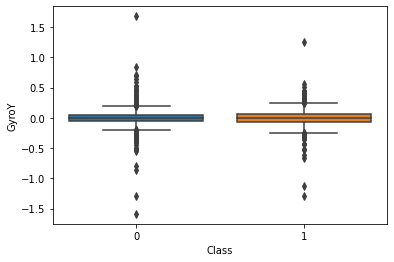

In [ ]:
sns.boxplot(x='Class', y='GyroY',data=df_train)
plt.show()

## Normalization: Min-Max

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
d = scaler.fit_transform(df_train.iloc[:,0:6])
df_train = pd.DataFrame(d, columns=df_train.columns[0:6]).join(df_train["Class"]).join(df_train["Timestamp"])

## Removing Outliers

In [ ]:
def outliers(df, feature):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3 - q1
  upper_lim = q3 + 1.5 * IQR
  lower_lim = q1 - 1.5 * IQR
  return upper_lim, lower_lim

u_ax, l_ax = outliers(df_train, 'AccX')
u_ay, l_ay = outliers(df_train, 'AccY')
u_az, l_az = outliers(df_train, 'AccZ')

u_gx, l_gx = outliers(df_train, 'GyroX')
u_gy, l_gy = outliers(df_train, 'GyroY')
u_gz, l_gz = outliers(df_train, 'GyroZ')

df_train = df_train[(df_train['AccX'] > l_ax) & (df_train['AccX'] < u_ax) & (df_train['AccY'] > l_ay) & (df_train['AccY'] < u_ay) & (df_train['AccZ'] > l_az) & (df_train['AccZ'] < u_az) & (df_train['GyroX'] > l_gx) & (df_train['GyroX'] < u_gx) & (df_train['GyroY'] > l_gy) & (df_train['GyroY'] < u_gy) & (df_train['GyroZ'] > l_gz) & (df_train['GyroZ'] < u_gz)]

## Time series of accelerometer data

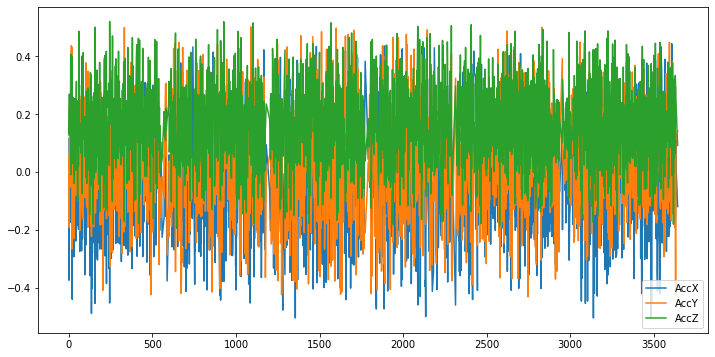

In [ ]:
df_train.loc[:,['AccX','AccY','AccZ']].plot(figsize=(15,8))
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

## Time series of Gyroscope data

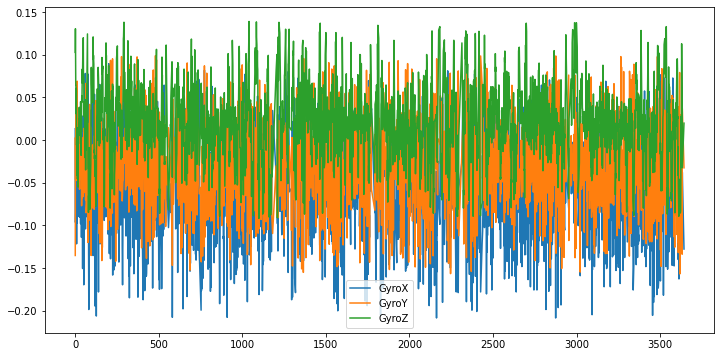

In [ ]:
df_train.loc[:,['GyroX','GyroY','GyroZ']].plot(figsize=(15,8))
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

In [ ]:
df_train.drop(['Timestamp'], axis=1, inplace=True)
df_test.drop(['Timestamp'], axis=1, inplace=True)

## Splitting Data

In [ ]:
x_train = df_train[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y_train = df_train[['Class']].values.ravel()

x_test = df_test[['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ']]
y_test = df_test[['Class']].values.ravel()

## Algorithms

In [ ]:
train, test, algo, f1_score_ = [], [], [], []

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, gnb.predict(x_test))*100)
print("Train Data Accuracy:", gnb.score(x_train,y_train))
print("Test Data Accuracy:", gnb.score(x_test,y_test))
train.append(gnb.score(x_train,y_train)*100)
test.append(gnb.score(x_test,y_test)*100)
algo.append('Naive Bayes')

Train Data Accuracy: 0.7425213675213675
Test Data Accuracy: 0.3317120622568093


### Decision Tree

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, dt.predict(x_test))*100)
print("Train Data Accuracy:", dt.score(x_train,y_train))
print("Test Data Accuracy:", dt.score(x_test,y_test))
train.append(dt.score(x_train,y_train)*100)
test.append(dt.score(x_test,y_test)*100)
algo.append('Decision Tree')

Train Data Accuracy: 1.0
Test Data Accuracy: 0.4802204928664073


### Extreme Gradient Boosting

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, xgb.predict(x_test))*100)
print("Train Data Accuracy:", xgb.score(x_train,y_train))
print("Test Data Accuracy:", xgb.score(x_test,y_test))
train.append(xgb.score(x_train,y_train)*100)
test.append(xgb.score(x_test,y_test)*100)
algo.append('Extreme Gradient Boosting')

Train Data Accuracy: 0.7834757834757835
Test Data Accuracy: 0.46173800259403375


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, rf.predict(x_test))*100)
print("Train Data Accuracy:", rf.score(x_train,y_train))
print("Test Data Accuracy:", rf.score(x_test,y_test))
train.append(rf.score(x_train,y_train)*100)
test.append(rf.score(x_test,y_test)*100)
algo.append('Random Forest')

Train Data Accuracy: 1.0
Test Data Accuracy: 0.5110246433203631


### Quadratic Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, qda.predict(x_test))*100)
print("Train Data Accuracy:", qda.score(x_train,y_train))
print("Test Data Accuracy:", qda.score(x_test,y_test))
train.append(qda.score(x_train,y_train)*100)
test.append(qda.score(x_test,y_test)*100)
algo.append('Quadratic Discriminant Analysis')

Train Data Accuracy: 0.7460826210826211
Test Data Accuracy: 0.33690012970168615


### Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, xtc.predict(x_test))*100)
print("Train Data Accuracy:", xtc.score(x_train,y_train))
print("Test Data Accuracy:", xtc.score(x_test,y_test))
train.append(xtc.score(x_train,y_train)*100)
test.append(xtc.score(x_test,y_test)*100)
algo.append('Extra Trees Classifier')

Train Data Accuracy: 1.0
Test Data Accuracy: 0.5898184176394293


### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, gbc.predict(x_test))*100)
print("Train Data Accuracy:", gbc.score(x_train,y_train))
print("Test Data Accuracy:", gbc.score(x_test,y_test))
train.append(gbc.score(x_train,y_train)*100)
test.append(gbc.score(x_test,y_test)*100)
algo.append('Gradient Boosting Classifier')

Train Data Accuracy: 0.7945156695156695
Test Data Accuracy: 0.582360570687419


### Light Gradient Boosting Machine

In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, lgbm.predict(x_test))*100)
print("Train Data Accuracy:", lgbm.score(x_train,y_train))
print("Test Data Accuracy:", lgbm.score(x_test,y_test))
train.append(lgbm.score(x_train,y_train)*100)
test.append(lgbm.score(x_test,y_test)*100)
algo.append('Light Gradient Boosting Machine')

Train Data Accuracy: 0.9184472934472935
Test Data Accuracy: 0.4721141374837873


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, lr.predict(x_test))*100)
print("Train Data Accuracy:", lr.score(x_train,y_train))
print("Test Data Accuracy:", lr.score(x_test,y_test))
train.append(lr.score(x_train,y_train)*100)
test.append(lr.score(x_test,y_test)*100)
algo.append('Logistic Regression')

Train Data Accuracy: 0.7364672364672364
Test Data Accuracy: 0.7140077821011673


### SVM

In [ ]:
from sklearn import svm
svm_ = svm.SVC()
svm_.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, svm_.predict(x_test))*100)
print("Train Data Accuracy:", svm_.score(x_train,y_train))
print("Test Data Accuracy:", svm_.score(x_test,y_test))
train.append(svm_.score(x_train,y_train)*100)
test.append(svm_.score(x_test,y_test)*100)
algo.append('SVM')

Train Data Accuracy: 0.7467948717948718
Test Data Accuracy: 0.7156290531776913


### Simple Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
sp = Perceptron()
sp.fit(x_train, y_train)
y_pred = sp.predict(x_test)
f1_score_.append(f1_score(y_test, sp.predict(x_test))*100)
print("Train Data Accuracy:", sp.score(x_train,y_train))
print("Test Data Accuracy:", sp.score(x_test,y_test))
train.append(sp.score(x_train,y_train)*100)
test.append(sp.score(x_test,y_test)*100)
algo.append('Simple Perceptron')

Train Data Accuracy: 0.7364672364672364
Test Data Accuracy: 0.7276264591439688


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, knn.predict(x_test))*100)
print("Train Data Accuracy:", knn.score(x_train,y_train))
print("Test Data Accuracy:", knn.score(x_test,y_test))
train.append(knn.score(x_train,y_train)*100)
test.append(knn.score(x_test,y_test)*100)
algo.append('KNN')

Train Data Accuracy: 0.7670940170940171
Test Data Accuracy: 0.607976653696498


### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=0)
ab.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, ab.predict(x_test))*100)
print("Train Data Accuracy:", ab.score(x_train,y_train))
print("Test Data Accuracy:", ab.score(x_test,y_test))
train.append(ab.score(x_train,y_train)*100)
test.append(ab.score(x_test,y_test)*100)
algo.append('Ada Boost')

Train Data Accuracy: 0.7624643874643875
Test Data Accuracy: 0.6378080415045395


### Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, lda.predict(x_test))*100)
print("Train Data Accuracy:", lda.score(x_train,y_train))
print("Test Data Accuracy:", lda.score(x_test,y_test)) 
train.append(lda.score(x_train,y_train)*100)
test.append(lda.score(x_test,y_test)*100)
algo.append('Linear Discriminant Analysis')

Train Data Accuracy: 0.7364672364672364
Test Data Accuracy: 0.706549935149157


### Ridge Classifier

In [ ]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(x_train, y_train)
f1_score_.append(f1_score(y_test, rc.predict(x_test))*100)
print("Train Data Accuracy:", rc.score(x_train,y_train))
print("Test Data Accuracy:", rc.score(x_test,y_test)) 
train.append(rc.score(x_train,y_train)*100)
test.append(rc.score(x_test,y_test)*100)
algo.append('Ridge Classifier')

Train Data Accuracy: 0.7364672364672364
Test Data Accuracy: 0.7198443579766537


## Algorithms vs Accuracy

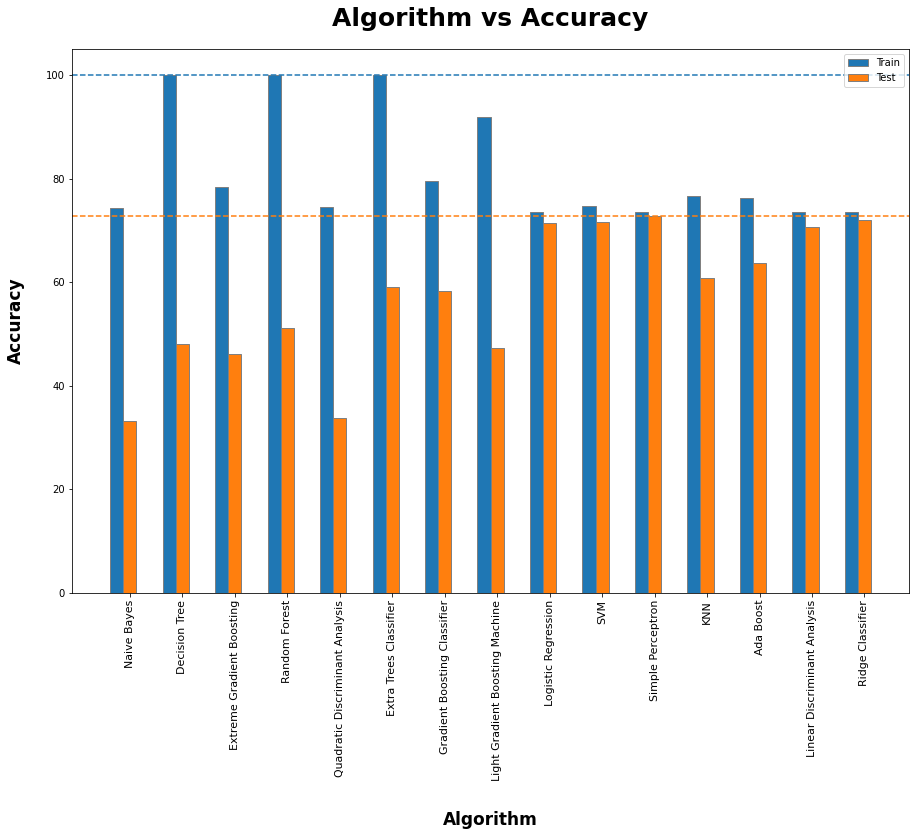

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 10))

br1 = np.arange(len(train))
br2 = [x + barWidth for x in br1]

plt.bar(br1, train, width = barWidth, edgecolor ='grey', label ='Train')
plt.bar(br2, test, width = barWidth, edgecolor ='grey', label ='Test')

plt.xlabel('Algorithm', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center', labelpad=30)
plt.ylabel('Accuracy', fontweight='bold', color = 'black', fontsize='17', verticalalignment='center', labelpad=30)
plt.title('Algorithm vs Accuracy', fontweight='bold', color = 'black', fontsize='25', verticalalignment='center', pad=30)
plt.xticks([r + barWidth for r in range(len(train))], algo, fontsize=11 ,rotation = 90)
plt.axhline(max(train), color='tab:blue', linestyle='--')
plt.axhline(max(test), color='tab:orange', linestyle='--')

plt.legend()
plt.show()

## Algorithms vs F1 Score

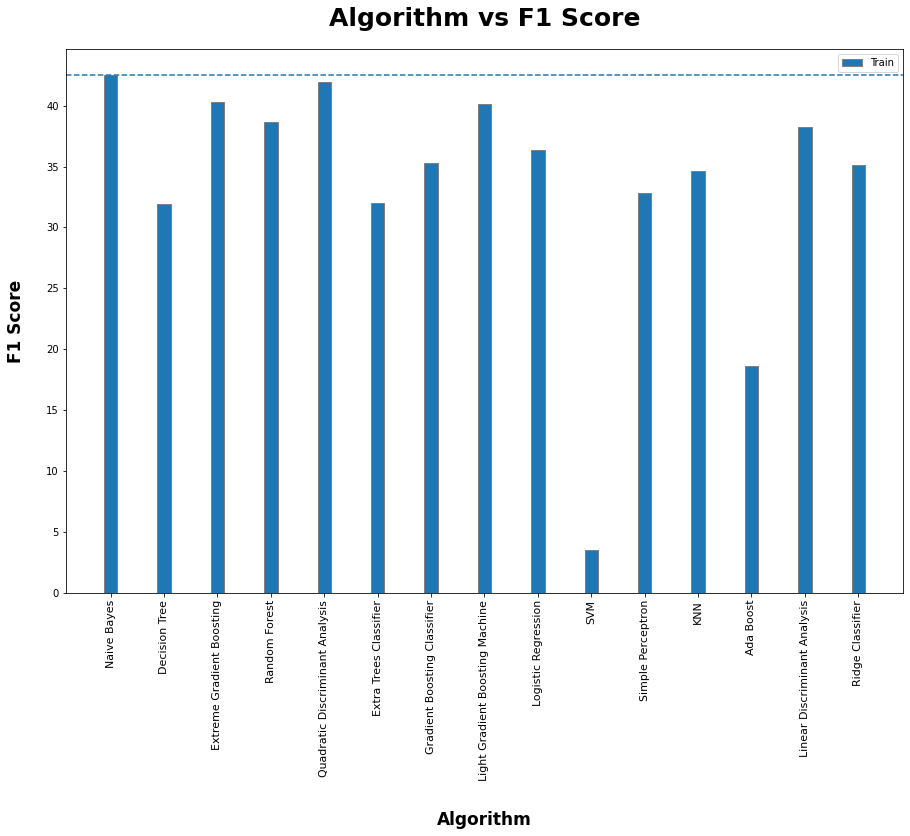

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(15, 10))

br1 = np.arange(len(train))

plt.bar(br1, f1_score_, width = barWidth, edgecolor ='grey', label ='Train')

plt.xlabel('Algorithm', fontweight='bold', color = 'black', fontsize='17', horizontalalignment='center', labelpad=30)
plt.ylabel('F1 Score', fontweight='bold', color = 'black', fontsize='17', verticalalignment='center', labelpad=30)
plt.title('Algorithm vs F1 Score', fontweight='bold', color = 'black', fontsize='25', verticalalignment='center', pad=30)
plt.xticks([r for r in range(len(f1_score_))], algo, fontsize=11 ,rotation = 90)
plt.axhline(max(f1_score_), color='tab:blue', linestyle='--')

plt.legend()
plt.show()

## Metrics for Simple Perceptron

Accuracy: 72.76%
F1 Score: 32.80%


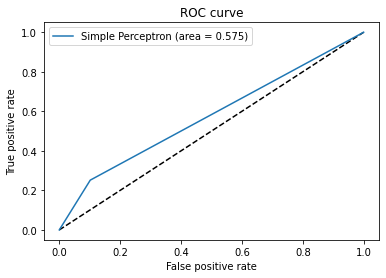

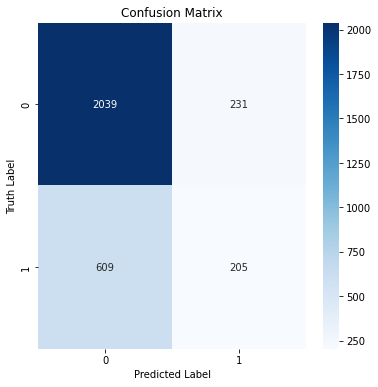

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_curve, auc, confusion_matrix
print("Accuracy: %0.2f%%" % (accuracy_score(y_test, y_pred)*100))
print("F1 Score: %0.2f%%" % (f1_score(y_test, y_pred)*100))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_ = auc(fpr, tpr)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Simple Perceptron (area = {:.3f})'.format(auc_))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,6))
sns.heatmap(cm, cbar=True, annot=True, fmt="d", cmap=plt.cm.Blues) 
plt.xlabel('Predicted Label') 
plt.ylabel('Truth Label')
plt.title('Confusion Matrix')

plt.show()